<a href="https://colab.research.google.com/github/george-azzari/ee-agriculture/blob/main/crop_phenology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Phenology in GEE


**By George Azzari (Woolpert Innovations)**

#  🔧 1 Setting things up

## 1.1 Install Dependencies

In [ ]:
!pip install -q geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
!pip install -q seaborn

In [ ]:
!pip install -q plotly_express

## 1.2 Initialize Modules

In [ ]:
from google.colab import auth # Interactive
auth.authenticate_user()

In [ ]:
import ee
import geemap
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px

## 1.3 Authenticate EE

In [ ]:
!earthengine authenticate

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=IcpnYtfSpBvIH90Fp2fP4Bd6cj4oNOqPR4Gcm0Iq4-Y&tc=9WyT6mIjpBRcfopPWqGTHkFU3SCtOaF9wpwgXvC7UqQ&cc=C6sOVJguvMfZjpOZLVNYZ5RbPDTVvuJ_0sXDR0vWJRQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AWtgzh4aXhuOP0do2ohF0_bcOarPAXe2DEmDh2ByEK-1kcq29FG9_eI5ru4

Successfully saved authorization token.


In [ ]:
ee.Initialize()


# 📥 2 Importing Field Data and definig ROIs

## 2.1 DWR Crop Mapping Data (California)



The data, collected by California's Department of Water Resources, is available here: https://data.cnra.ca.gov/dataset/statewide-crop-mapping

### Importing as FeatureCollection

First, we call in FMC fields in Indiana to define the ROI for our tests.

In [ ]:
dwr_2020 =
dwr_2021 = ee.FeatureCollection('projects/hutch-sandbox/assets/fmc-workshop/indiana-corn')

indiana_df = geemap.ee_to_geopandas(indiana_fc.limit(20))
indiana_df.head()

geometry  crop         end  index  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...  corn  2022-08-31      0   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...  corn  2022-08-31      1   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...  corn  2022-08-31      2   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...  corn  2022-08-31      3   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...  corn  2022-08-31      4   

    region       start  
0  Indiana  2022-04-15  
1  Indiana  2022-04-15  
2  Indiana  2022-04-15  
3  Indiana  2022-04-15  
4  Indiana  2022-04-15

It looks like the fields don't have a unique ID, which a useful thing to have when running analysis down the line. We'll create one by adding a random column.

In [ ]:
indiana_fc = indiana_fc.randomColumn('FID',348).map(
    lambda f: f.set('FID', ee.String('FID').cat(ee.Number(f.get('FID')).multiply(1e6).toInt().format()))
)

In [ ]:
indiana_df = geemap.ee_to_geopandas(indiana_fc.limit(20))
indiana_df.head()

geometry        FID  crop  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...  FID920997  corn   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...  FID418483  corn   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...  FID208761  corn   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...   FID97940  corn   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...  FID787599  corn   

          end  index   region       start  
0  2022-08-31      0  Indiana  2022-04-15  
1  2022-08-31      1  Indiana  2022-04-15  
2  2022-08-31      2  Indiana  2022-04-15  
3  2022-08-31      3  Indiana  2022-04-15  
4  2022-08-31      4  Indiana  2022-04-15

Finally we define the general area of interest as the baounding box that contains all fields:

In [ ]:
# Get the outer box of the whole collection (useful for filtering image collections to this ROI)
roi = indiana_fc.geometry().bounds(100)

### Defining test areas

From the original collection, we want to extract a couple of fields to use as test regions. We'll also take the centroid of the fields to use as test points.

In [ ]:
# Extract two fields from the collection (useful for testing and plotting)
n1 = 15
testfield1 = ee.Feature(indiana_fc.toList(1,n1).get(0))
n2 = 13
testfield2 = ee.Feature(indiana_fc.toList(1,n2).get(0))

In [ ]:
# Take out the center points from the test fields
testpoint1 = testfield1.centroid()
testpoint2 = testfield2.centroid()

### Visualizing on a map

In [ ]:
Map1 = geemap.Map()
Map1.centerObject(roi, 10)
Map1.add_basemap(basemap='HYBRID')
Map1.addLayer(roi, {'color':'#330181'}, 'ROI', True)
Map1.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map1.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map1.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map1.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map1.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map1

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…

# 🏞️ 3 Pre-Processing Earth Observations

## 3.1 Sentinel 2 Collections

Sentinel 2 is a constellation of satellites that image the whole planet every 5 days at a resolution between 10 and 60 meters per pixel, depending on the acquisition band. We will use the Surface Reflectance collection for this example.


As a first step, we define a function to load the collection, and filter it for the desired date range, the area of interest, and the fraction of cloud cover. This way we limit the size of a huge dataset.

In [ ]:
def getSentinelSRCore(region, startdate, enddate, cloudthres):
  """
  Fetch all the images in the S2_SR collection that match the required criteria
  (region, and time period).
  Args:
  region (ee.Geometry): filter all images to intersect the boundaries this geometry.
  startdate (ee.Date):  filter all images to start at this date.
  enddate (ee.Date):  filter all images to end at this date.
  """
  name = "COPERNICUS/S2_SR"
  coll = ee.ImageCollection(name).filterBounds(region)
  coll = coll.filterDate(startdate, enddate)
  coll = coll.filter(ee.Filter.lte('CLOUDY_PIXEL_PERCENTAGE', cloudthres))

  return coll

## 3.2 Image Preprocessing

Below we're defining a set of functions useful to preprocess Sentinel 2 images, including:
* proper scaling
* renaming of bands
* removing clouds and other contaminated pixels
* computing vegetation indices

It's usually a good practice to rename the reflectance bands, which have generic 'BX' names, to something more descriptive. In addition, some of bands need to be rescaled back to their original units as, for practical reasons, they're stored as integers (the scaling factors are reported in the image's metadata). This is particularly important for reflectance bands, as some vegetation indices are defined from reflectance values.

### Renaming and Scaling

In [ ]:
  # BAND INFORMATION FROM METADATA
  # Name        Min Max     Scale   Resolution	Wavelength	Description
  # B1          0   10000	  0.0001  60 METERS   443nm       Aerosols
  # B2          0   10000	  0.0001	10 METERS   490nm       Blue
  # B3          0   10000	  0.0001	10 METERS   560nm       Green
  # B4          0   10000	  0.0001	10 METERS   665nm       Red
  # B5          0   10000	  0.0001	20 METERS   705nm       Red Edge 1
  # B6          0   10000	  0.0001	20 METERS   740nm       Red Edge 2
  # B7          0   10000	  0.0001	20 METERS   783nm       Red Edge 3
  # B8          0   10000	  0.0001	10 METERS   842nm       NIR
  # B8a         0   10000 	0.0001	20 METERS   865nm       Red Edge 4
  # B9          0   10000	  0.0001	60 METERS   940nm       Water vapor
  # B11         0   10000	  0.0001	20 METERS   1610nm      SWIR 1
  # B12         0   10000	  0.0001	20 METERS   2190nm      SWIR 2
  # AOT         0   10000   0.0001  10 METERS               Aerosol Optical Thickness
  # WVP         0   10000   0.0001  10 METERS               Water Vapor Pressure
  # SCL         1   11      0.0001  20 METERS               Science Classification Map
  # TCI_R       0   10000   0.0001  10 METERS               True Color Image, Red Channel
  # TCI_G       0   10000   0.0001  10 METERS               True Color Image, Green Channel
  # TCI_B       0   10000   0.0001  10 METERS               True Color Image, Blue Channel
  # MSK_CLDPRB  0   100     0.0001  20 METERS               Cloud Probability Map
  # MSK_SNWPRB  0   100     0.0001  10 METERS               Snow Probability Map
  # QA10                            10 METERS               Always empty
  # QA20                            20 METERS               Always empty
  # QA60                            60 METERS               Cloud mask

In [ ]:
def rename(img):
    # Only the spectral bands need to be renamed:
    orignames = img.bandNames()

    specbands = ee.List([
    'AEROS', 'BLUE',  'GREEN', 'RED',
    'RDED1', 'RDED2', 'RDED3', 'NIR',
    'RDED4', 'VAPOR', 'SWIR1', 'SWIR2'])

    otherbands = orignames.slice(12)

    img = img.rename(specbands.cat(otherbands))

    return img

In [ ]:
def scale(img):
    """
    Scale bands back to original reflectance units.Note that
    :param img: ee.Image
    :return: ee.Image
    """

    nottoscale = ee.List(['QA10', 'QA20', 'QA60'])
    toscale = ee.Image(img).bandNames().removeAll(nottoscale)

    scaler = ee.Number(0.0001)

    scaled_optical = ee.Image(img).select(toscale).multiply(scaler)

    return img.addBands(scaled_optical, None, True)

### Quality Masking

The Sentinel 2 SR product comes with a pre-classified band that highlighs contaminated pixels. The band is called 'SCL' and its classes are listed in the function below. Here we are masking out all the contaminated pixels from an input image.

In [ ]:
def clean(img):
  """
  1	#ff0004	Saturated or defective
  2	#868686	Dark Area Pixels
  3	#774b0a	Cloud Shadows
  4	#10d22c	Vegetation
  5	#ffff52	Bare Soils
  6	#0000ff	Water
  7	#818181	Clouds Low Probability / Unclassified
  8	#c0c0c0	Clouds Medium Probability
  9	#f1f1f1	Clouds High Probability
  10 #bac5eb	Cirrus
  11 #52fff9	Snow / Ice
  Args:
  """

  badvals = ee.List([1,2,3,7,8,9,10,11])
  masks = badvals.map(lambda c: img.select('SCL').neq(ee.Number(c)))
  mask = ee.ImageCollection.fromImages(masks).And()
  img = img.updateMask(mask)

  return img.addBands(mask.select([0],['GOODPXS']))


The function below computes some of the classic  vegetation indices: NDVI, GCVI.

### Computing Vegetation Indices

In [ ]:
def addVI(img):
    """
    Compute two classic Vegetation Indeces: GCVI and NDVI.
    :param img:
    :return:
    """
    ndvi = img.expression(
        '(nir - red) / (red + nir)',
        {
            'nir': img.select('NIR'),
            'red': img.select('RED')

        }).select([0], ['NDVI'])

    gcvi = img.expression(
        '(nir / green) - 1',
        {'nir': img.select('NIR'),
          'green': img.select('GREEN')
          }).select([0], ['GCVI'])

    return img.addBands(gcvi).addBands(ndvi)

## 3.3 Putting it all together

Finally, we put everything together into a function that first loads the collection filtered by our parameters, and then maps all the pre-processing functions through it.

In [ ]:
def getSentinelSR(region, startdate, enddate, cloudthres):
  coll = getSentinelSRCore(region, startdate, enddate, cloudthres)
  coll = coll.map(rename).map(scale).map(clean).map(addVI)
  return coll

Let's set up some test variables and run our Sentinel 2 pre-processing pipeline.

In [ ]:
start = ee.Date.fromYMD(2020,4,1)
end = ee.Date.fromYMD(2020,11,1)
cloudthres = 30
s2coll = getSentinelSR(roi, start, end, cloudthres)

In [ ]:
# s2coll.first().getInfo()
nimg = 5 # n= 5 is a lot less green
testimg = ee.Image(s2coll.toList(1,nimg).get(0))

In [ ]:
#  testimg.toDictionary().getInfo()

## 3.4 Visualizing one image

In [ ]:
Map2 = geemap.Map()
Map2.add_basemap(basemap='HYBRID')
Map2.centerObject(roi, 12)
Map2.addLayer(roi, {'color':'#330181'}, 'ROI', False)
Map2.addLayer(testimg.clip(roi), {'bands':['SWIR1','NIR','BLUE'], 'min':0.1, 'max':0.9}, 'Test Image NIR')
Map2.addLayer(testimg.clip(roi), {'bands':['TCI_R','TCI_G','TCI_B'], 'min':0, 'max':0.02}, 'Test Image')
Map2.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map2.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map2.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map2.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map2.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map2

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…

# 📊 3 Extracting Regional Aggregations




Google Earth Engine can be used to efficiently extract aggregated image data from specific regions via its large collection of operators called reducers: more information on this can be found [here](https://developers.google.com/earth-engine/guides/reducers_reduce_region).

Note: extracting data is where computation and memory limits for online processing can start to get tricky, and users should switch to batch processing for large scale analysis (see the introduction for more information on this). We'll keep it lightweight in these examples but we'll also add an example to export results in batch computing.

## 3.1 Reducing an image from a set of regions

EE Guide: https://developers.google.com/earth-engine/guides/reducers_reduce_region

A common use case in EO analysis in extracting regional information within multiple areas from a single image. In doing so, we want to run one or more computations from the pixels within each region, and bring the results into a table along with the metadata of the source image and the region (including its geometry). The function below does exactly that:

In [ ]:
def reduceImgRegions(img, regions, scale, reducer):

    reducoll = img.reduceRegions(
          reducer=reducer,
          collection=regions,
          scale=scale,
          tileScale=2
          )

    # Copying some info from the image
    imgprops = img.toDictionary(['system:time_start','GRANULE_ID'])

    reducoll = reducoll.map(
        lambda f: f.set(imgprops)
        )

    return reducoll

Testing the output:

In [ ]:
indiana_subset = indiana_fc.limit(5) #keeping it small for online testing
test_reducer = ee.Reducer.mean()
indiana_subset_stats = reduceImgRegions(testimg, indiana_subset, 10, test_reducer)

In [ ]:
indiana_subset_stats_df = geemap.ee_to_geopandas(indiana_subset_stats)
indiana_subset_stats_df.head()

geometry     AEROS       AOT  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...  0.083259  0.010900   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...  0.104832  0.010966   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...  0.095994  0.011000   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...  0.084180  0.010911   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...  0.093456  0.011000   

       BLUE        FID      GCVI  GOODPXS                          GRANULE_ID  \
0  0.095586  FID920997  1.203507        1  L2A_T16TEK_A025963_20200611T164203   
1  0.130024  FID418483  1.058446        1  L2A_T16TEK_A025963_20200611T164203   
2  0.117971  FID208761  1.111645        1  L2A_T16TEK_A025963_20200611T164203   
3  0.102384   FID97940  1.273252        1  L2A_T16TEK_A025963_20200611T164203   
4  0.120687  FID787599  0.854056        1  L2A_T16TEK_A025963_20200611T164203   

      GREEN  MSK_CLDPRB  ...     TCI_G     TCI_R     VAPOR       WVP  crop  \
0  0.132589           0  ...  0.013519  0.016325  0.294492  0.093635  corn   
1  0.186572           0  ...  0.018980  0.021758  0.380725  0.102608  corn   
2  0.170770           0  ...  0.017397  0.020874  0.357998  0.098938  corn   
3  0.146680           0  ...  0.014951  0.018532  0.337416  0.095270  corn   
4  0.166586           0  ...  0.016973  0.021877  0.315595  0.101770  corn   

          end  index   region       start  system:time_start  
0  2022-08-31      0  Indiana  2022-04-15      1591893751123  
1  2022-08-31      1  Indiana  2022-04-15      1591893751123  
2  2022-08-31      2  Indiana  2022-04-15      1591893751123  
3  2022-08-31      3  Indiana  2022-04-15      1591893751123  
4  2022-08-31      4  Indiana  2022-04-15      1591893751123  

[5 rows x 35 columns]

## 3.2 Reducing an image collection from a set of regions

Often, temporal changes are an important part of the analysis, in which case we may want to export regional statistics from multiple images spanning a given time range. In that case, the function above can be be mapped through an ImageCollection:

In [ ]:
def reduceImgCollRegions(imgcoll, regions, scale, reducer):

  reducoll = imgcoll.map(
      lambda img: reduceImgRegions(img, regions, scale, reducer)
  ).flatten()

  return reducoll

Testing the output:

In [ ]:
imgcoll_subset = s2coll #keeping it small for online testing
indiana_subset_coll_stats = reduceImgCollRegions(imgcoll_subset, indiana_subset, 10, test_reducer)

In [ ]:
indiana_subset_coll_stats_df = geemap.ee_to_geopandas(indiana_subset_coll_stats)
indiana_subset_coll_stats_df.head()

geometry     AEROS     AOT  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...  0.083748  0.0196   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...  0.091429  0.0196   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...  0.060115  0.0196   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...  0.075633  0.0196   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...  0.054548  0.0196   

       BLUE        FID      GCVI  GOODPXS                          GRANULE_ID  \
0  0.098103  FID920997  0.815644      1.0  L2A_T16TEK_A024962_20200402T164102   
1  0.114659  FID418483  0.699813      1.0  L2A_T16TEK_A024962_20200402T164102   
2  0.076575  FID208761  1.022783      1.0  L2A_T16TEK_A024962_20200402T164102   
3  0.092715   FID97940  0.957450      1.0  L2A_T16TEK_A024962_20200402T164102   
4  0.071938  FID787599  1.088538      1.0  L2A_T16TEK_A024962_20200402T164102   

      GREEN    MSK_CLDPRB  ...     TCI_G     TCI_R     VAPOR       WVP  crop  \
0  0.132366  0.000000e+00  ...  0.013500  0.017421  0.245579  0.078280  corn   
1  0.158836  0.000000e+00  ...  0.016190  0.020808  0.271727  0.080677  corn   
2  0.114736  3.748797e-08  ...  0.011708  0.014564  0.233277  0.078588  corn   
3  0.126074  0.000000e+00  ...  0.012857  0.017080  0.255371  0.078652  corn   
4  0.104918  0.000000e+00  ...  0.010711  0.014169  0.224445  0.074575  corn   

          end  index   region       start  system:time_start  
0  2022-08-31      0  Indiana  2022-04-15      1585845740663  
1  2022-08-31      1  Indiana  2022-04-15      1585845740663  
2  2022-08-31      2  Indiana  2022-04-15      1585845740663  
3  2022-08-31      3  Indiana  2022-04-15      1585845740663  
4  2022-08-31      4  Indiana  2022-04-15      1585845740663  

[5 rows x 35 columns]

Visualizing the output: time series of average field GCVI grouped by field.

In [ ]:
fig2 = px.line(indiana_subset_coll_stats_df, x='system:time_start', y='GCVI', color='FID')
fig2.show()

## 3.3 Combining reducers

Different reducers can be combined into a single reducer (which is more efficient than running each separately):

In [ ]:
comb_reducer = ee.Reducer.mean()\
  .combine(ee.Reducer.min(),sharedInputs=True)\
  .combine(ee.Reducer.max(),sharedInputs=True)

indiana_subset_coll_totstats = reduceImgCollRegions(imgcoll_subset, indiana_subset, 10, comb_reducer)

In [ ]:
indiana_subset_coll_totstats_df = geemap.ee_to_geopandas(indiana_subset_coll_totstats)

In [ ]:
indiana_subset_coll_totstats_df.head()

geometry  AEROS_max  AEROS_mean  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...     0.1132    0.083748   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...     0.1375    0.091429   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...     0.1148    0.060115   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...     0.0858    0.075633   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...     0.0658    0.054548   

   AEROS_min  AOT_max  AOT_mean  AOT_min  BLUE_max  BLUE_mean  BLUE_min  ...  \
0     0.0398   0.0196    0.0196   0.0196    0.1912   0.098103    0.0191  ...   
1     0.0355   0.0196    0.0196   0.0196    0.1874   0.114659    0.0166  ...   
2     0.0250   0.0196    0.0196   0.0196    0.2474   0.076575    0.0104  ...   
3     0.0383   0.0196    0.0196   0.0196    0.1390   0.092715    0.0264  ...   
4     0.0142   0.0196    0.0196   0.0196    0.1280   0.071938    0.0001  ...   

  VAPOR_min  WVP_max  WVP_mean  WVP_min  crop         end  index   region  \
0    0.1425   0.1084  0.078280   0.0387  corn  2022-08-31      0  Indiana   
1    0.1543   0.1033  0.080677   0.0405  corn  2022-08-31      1  Indiana   
2    0.1680   0.1036  0.078588   0.0482  corn  2022-08-31      2  Indiana   
3    0.2112   0.1009  0.078652   0.0614  corn  2022-08-31      3  Indiana   
4    0.1747   0.1207  0.074575   0.0545  corn  2022-08-31      4  Indiana   

        start  system:time_start  
0  2022-04-15      1585845740663  
1  2022-04-15      1585845740663  
2  2022-04-15      1585845740663  
3  2022-04-15      1585845740663  
4  2022-04-15      1585845740663  

[5 rows x 87 columns]

## 3.4 Interactive Analysis in JS

Here is an example script I implemented to run similar analysis in Brazil, using FMC traps locations:

https://code.earthengine.google.com/361e0f4ff71e3532ff5847ffdecf6daf

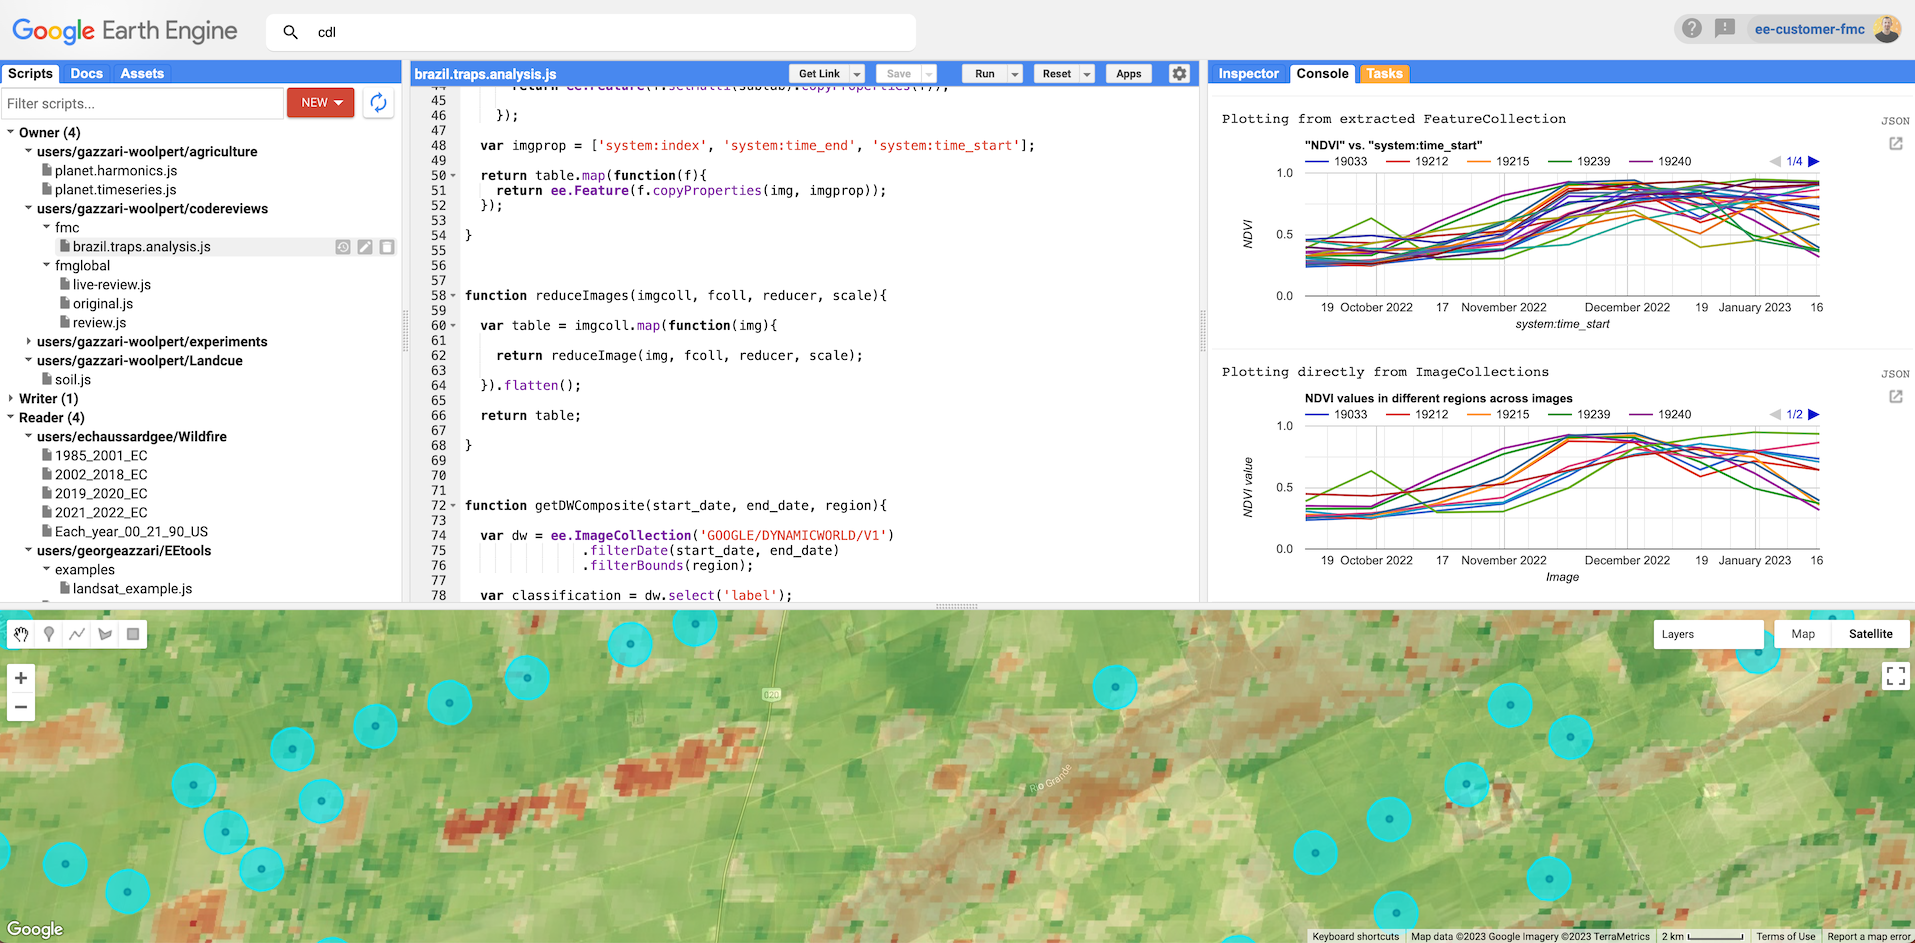

## 3.5 Batch export for large scale analysis

# ⚙️ 4 Compositing Image Collections

The reducers we used for regional analysis in the previous section can be also applied to a "vertical" stack of pixels, i.e. the values of a given pixel across an image collection. The reusult of this operation is a summary value of all observations for that pixel. EE can run this operation across all pixels in a given scene to create a image composite.

## 4.1 Simple Composites

Composites can be based on very simple operations; for example to obtain a cloud-free composite of our Sentinel 2 collection we can simply run a median reducer:

In [ ]:
s2med = s2coll.reduce(ee.Reducer.median())

## 4.2 Harmonic Composites

In agriculture-focused applications of EOs, it's often important to capture the development of crops through the growing season, and characterize their seasonality. In situations like those, the compositing ability EE can be a very powerful tool to apply more sophisticated time series analysis techniques. For a detailed overview on this topic, see [this slide deck](https://goo.gl/lMwd2Y) from Nicholas Clinton.

Among these techniques, Fourier Transforms are really useful tools for signals that are periodic in time - such as seasonal crop greenness. This approach basically consist in approximating a signal as a sum of sines and cosines functions of increasingly higher frequency. The best fitting combination of sines and cosines for a series of observed variables, e.g. NDVI, can be determined with a simple linear regression. Luckily for us, one of the reducers EE provides is a linear regression function!

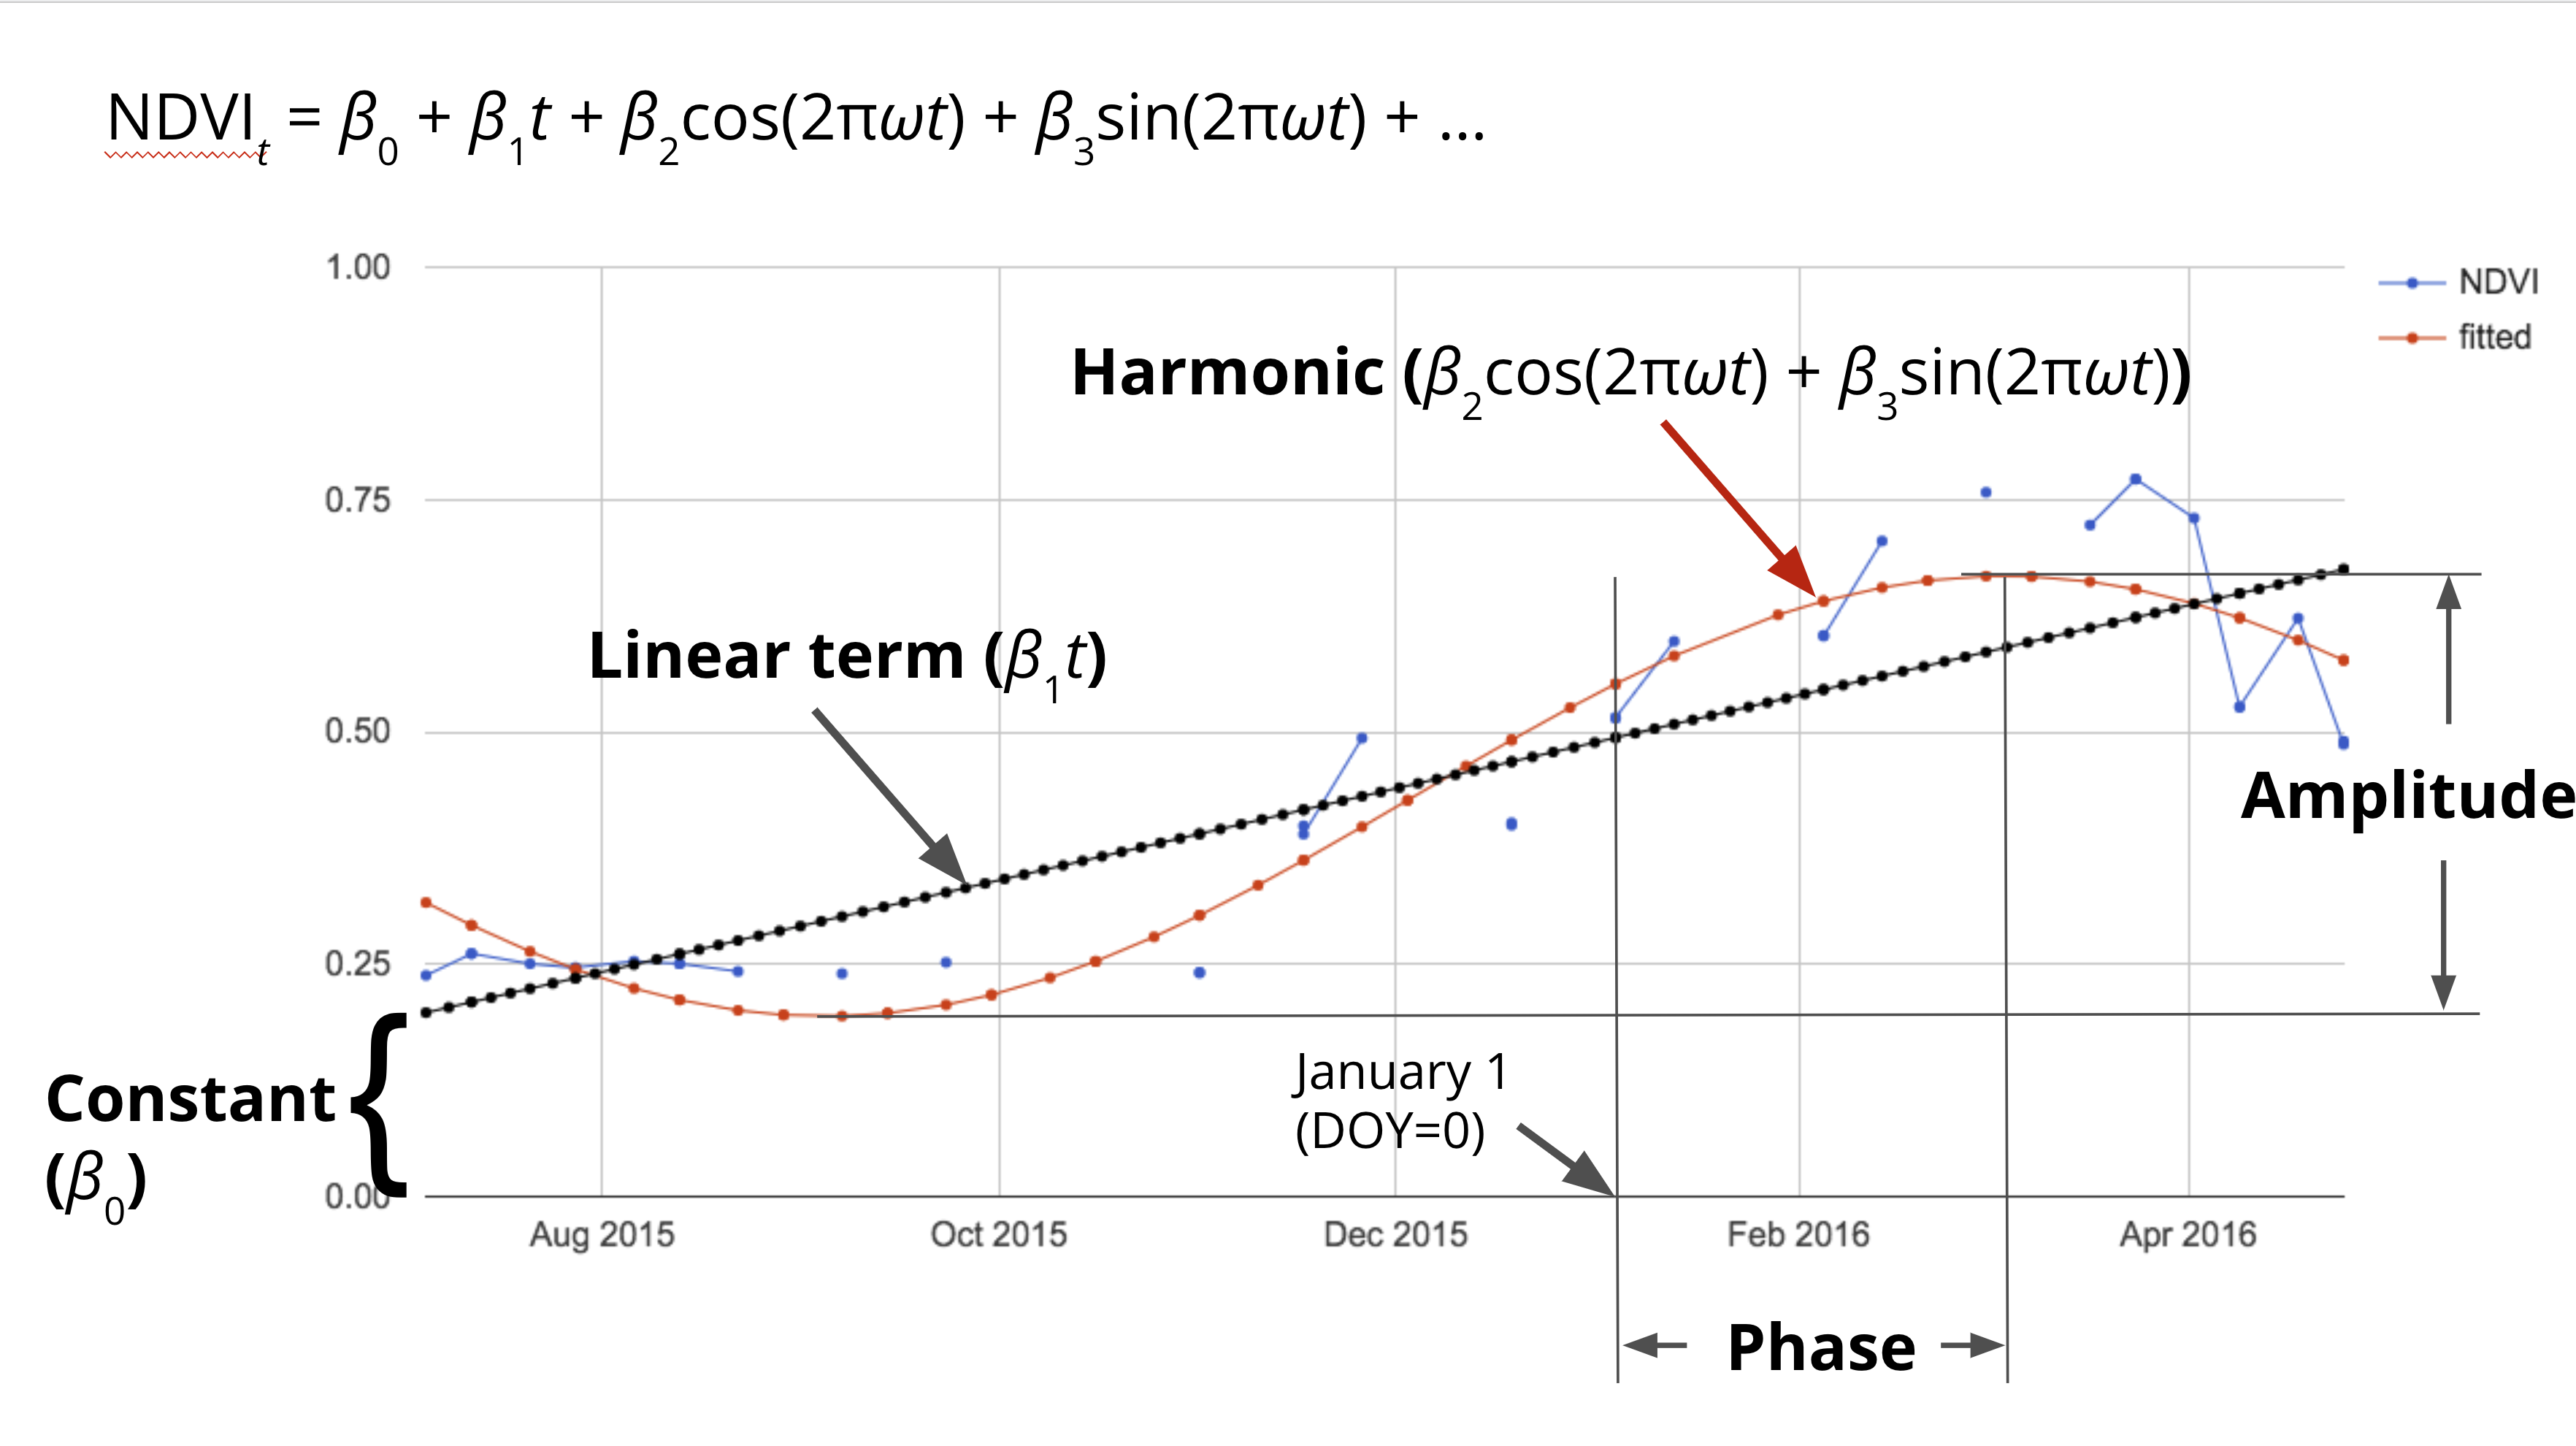

### 4.2.1 Harmonics Independents

First, from the time stamp of each image in our collection, we compute the independents of the harmonic regression (i.e. the sine and cosine functions), and we add them as bands to each Sentinel 2 image.

In [ ]:
def getNthHarmonic(n, omega, timeband):

    n= ee.Number(n).toInt()
    timerad = timeband.multiply(n).multiply(ee.Number(2*np.pi)).multiply(ee.Number(omega))

    hcos = timerad.cos().rename(ee.String('cos').cat(n.format()))
    hsin = timerad.sin().rename(ee.String('sin').cat(n.format()))

    return ee.List([hcos, hsin])

In [ ]:
def addHarmonics(image, refdate, nharmonics, omega):

    image = ee.Image(image)
    date = image.date()

    # Letting user pick the reference date
    dyear = date.difference(refdate, 'year')
    t = image.select(0).multiply(0).add(dyear).select([0],['t']).float()
    constant = t.divide(t).rename('constant')

    timeradians = ee.List.sequence(1, nharmonics, 1).map(lambda n: getNthHarmonic(n, omega, t)).flatten()
    # Gotta do this dance to avoid the default n_ prefix when using toBands:
    hbandnames = timeradians.map(lambda img: ee.Image(img).bandNames()).flatten()
    # Convert list into a collection and smash into an image.
    timeradsimg = ee.ImageCollection.fromImages(timeradians).toBands()
    timeradsimg =timeradsimg.rename(hbandnames)

    # Updating the input image w/ new harmonic bands
    image = image.addBands(timeradsimg).addBands(constant).addBands(t)
    image = image.set('independents', timeradsimg.bandNames().add('t').add('constant'))
    image = image.set('refdate', refdate)

    return image

In [ ]:
def getHarmonicCollection(imgcoll, refdate, nharmonics, omega):
    """
    Attach harmonic independents to an input image collection
    """

    # Add harmonic terms as new image bands to collection.
    harmonic_coll = imgcoll.map(lambda img: addHarmonics(img, refdate, nharmonics, omega))
    harmonic_coll = harmonic_coll.set('refdate', refdate,'nharmonics', nharmonics, 'omega', omega)

    startdate = ee.Date.millis(s2coll.aggregate_min('system:time_start'))
    enddate = ee.Date.millis(s2coll.aggregate_max('system:time_start'))
    harmonic_coll = harmonic_coll.set('startdate', startdate, 'enddate', enddate)

    return  harmonic_coll

### 4.2.2 Harmonic Regressions

Now we can run the regressions, using the image's spectral bands as dependents (i.e. what we want to "predict) and the harmonic independents we just created:

In [ ]:
def _bandHarmonicRegression(harmonicoll, refdate, nharmonics, omega, independents, band):

    independents = ee.List(independents)
    dependent = ee.String(band)

    regressors = harmonicoll.select(independents.add(dependent))
    regression = regressors.reduce(ee.Reducer.linearRegression(independents.length(), 1))

    # New names for coefficients
    newnames = independents.map(lambda b: dependent.cat(ee.String('_')).cat(ee.String(b)))
    # Turn the array image into a multi-band image of coefficients.
    imgcoeffs = regression.select('coefficients').arrayProject([0]).arrayFlatten([independents])
    imgcoeffs = imgcoeffs.select(independents, newnames)

    mean = harmonicoll.select([dependent]).reduce('mean')
    mean = mean.select([0], [ee.String(band).cat(ee.String('_mean'))])

    return imgcoeffs.addBands(mean)

In [ ]:
def harmonicRegression(harmonicoll, refdate, nharmonics, omega, independents, bands):

    if independents is None:
        independents = ee.List(ee.Image(harmonicoll.first()).get('independents'))

    coefficients = ee.List(bands).map(lambda band: _bandHarmonicRegression(harmonicoll, refdate, nharmonics, omega, independents, band))
    # Gotta do this dance to avoid the default n_ prefix when using toBands:
    coeffnames = coefficients.map(lambda img: ee.Image(img).bandNames()).flatten()
    coeffimg = ee.ImageCollection.fromImages(coefficients).toBands().rename(coeffnames)

    # Carrying source collection start/end for convenience
    startdate = ee.Date(harmonicoll.get('startdate'))
    enddate = ee.Date(harmonicoll.get('enddate'))

    return coeffimg.set(
        'independents',independents,
        'bands', bands,
        'nharmonics', nharmonics,
        'omega', omega,
        'refdate', refdate,
        'startdate', startdate,
        'enddate', enddate)

### 4.2.3 Phase and Amplitude

Finally, we calculate the phase and amplitude of the regressing curves. This is not necessary, but it's helpful to think in terms of phase and amplitude.

In [ ]:
def _getNthPhaseAmplitude(harmregrimg, band, n):

      n = ee.Number(n).toInt().format()
      cosname = band.cat(ee.String('_cos')).cat(n)
      sinname = band.cat(ee.String('_sin')).cat(n)

      # Compute phase and amplitude.
      phase = harmregrimg.select(cosname).atan2(harmregrimg.select(sinname))\
        .select([0],[band.cat(ee.String('_PHASE')).cat(n)])

      amplitude = harmregrimg.select(cosname).hypot(harmregrimg.select(sinname))\
        .select([0],[band.cat(ee.String('_AMPLITUDE')).cat(n)])

      return ee.List([phase, amplitude])

In [ ]:
def getPhaseAmplitude(harmregrimg, band):

   band = ee.String(band)
   nharmonics = ee.Number(harmregrimg.get('nharmonics'))

   phaseamplist = ee.List.sequence(1, nharmonics, 1).map(
       lambda n: _getNthPhaseAmplitude(harmregrimg, band, n)
   ).flatten()

   # Gotta do this dance to avoid a dumb n_ prefix when using toBands:
   panames = phaseamplist.map(lambda img: ee.Image(img).bandNames()).flatten()
   phaseampl_img = ee.ImageCollection.fromImages(phaseamplist).toBands().rename(panames)

   lrvertshift = harmregrimg.select(
    [band.cat(ee.String('_constant'))],
    [band.cat(ee.String('_LRVERTSHIFT'))]
   )

   mnvertshift = harmregrimg.select(
    [band.cat(ee.String('_mean'))],
    [band.cat(ee.String('_MNVERTSHIFT'))]
   )

   return phaseampl_img.addBands(lrvertshift).addBands(mnvertshift)


Phase and amplitude can be represented in an HSV colorspace for useful visualizations. In this representation, the hue will track the phase, the saturation will track the amplitude, and the value will track the intersection.

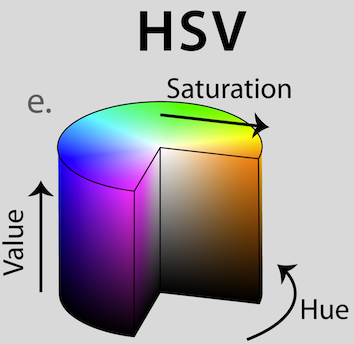

In [ ]:
def vizPhaseAmplitude(phasampl, band, ntoviz, ampl_scaler, shift_scaler):

  vshift = phasampl.select(band+'_MNVERTSHIFT')

  phasescale_min = -np.pi
  phasescale_max = np.pi

  phase = phasampl.select(band+'_PHASE{n}'.format(n=str(ntoviz)))\
    .unitScale(phasescale_min, phasescale_max)

  amplitude = phasampl.select(band+'_AMPLITUDE{n}'.format(n=str(ntoviz)))

  scaled_ampl = amplitude.multiply(ampl_scaler)
  scaled_vshift = vshift.multiply(shift_scaler)

  rgb = ee.Image.cat(phase, scaled_ampl, scaled_vshift).hsvToRgb()

  return rgb

### 4.2.4 Putting it all together

#### Core Regression

In [ ]:
# refdate = ee.Date.fromYMD(2022,1,1)
refdate = start
nharmonics = 3
omega = 1

In [ ]:
harmonics = getHarmonicCollection(s2coll, refdate, nharmonics, omega)
testharm = addHarmonics(testimg, refdate, nharmonics, omega)

In [ ]:
# harmonics.getInfo()

In [ ]:
harmregr = harmonicRegression(harmonics, refdate, nharmonics, omega, None, ['GCVI'])

In [ ]:
harmregr

#### Phase and Amplitude

In [ ]:
phasampl = getPhaseAmplitude(harmregr, 'GCVI')

In [ ]:
phasampl.bandNames()

In [ ]:
# The second harmonic shows more differentiation
paviz = vizPhaseAmplitude(phasampl, 'GCVI', 2, 0.008, 0.25)

In [ ]:
paviz.bandNames()

In [ ]:
Map3 = geemap.Map()
Map3.centerObject(roi, 12)
Map3.addLayer(roi, {'color':'#330181'}, 'ROI', False)
Map3.addLayer(testimg.clip(roi), {'bands':['TCI_R','TCI_G','TCI_B'], 'min':0, 'max':0.02}, 'Test Image')
Map3.addLayer(paviz.clip(roi), {'bands':['red','green','blue']}, 'Phase Amplitude 1')
Map3.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map3.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map3.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map3.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map3.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map3

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…

Visualizing the different phases and amplitudes show how effective this approach is in resolving for different land cover and even crop types. This is particularly helpful in classification applications (more on this below).

### 4.2.5 Batch Export for large scale composites

These online examples are dealing with fairly small amounts of data; however, when running large-scale computations, it's easier to hit memory and time limits. A highly recommend approach when generating bug composites is to batch-export them into EE assets (or in a GCP bucket) and then re-import them for the remaining of the pipeline. This avoids having the need run all the computations each time the composites are used for analysis, and makes it more efficient to run downstream applications.

⚠️ NOTE: to run the three cells below you'll need to change the path to point at your EE assets location.

In [ ]:
fname = 'fmc_harmonic_phase_amplitude_gcvi_2020'
path = 'projects/ee-customer-fmc/assets/test_data'
image = phasampl.addBands(paviz)

exptask_asset =ee.batch.Export.image.toAsset(**{
    'image':image,
    'description':fname,
    'assetId':path+fname,
    'region':roi,
    'scale':10,
    'maxPixels':1e10,
    })

In [ ]:
exptask_cloud = ee.batch.Export.image.toCloudStorage(**{
    'image':image,
    'description':fname,
    'bucket':'georges-ee-bucket',
    'fileNamePrefix':'fmctest/'+fname,
    'region':roi,
    'scale':10,
    'maxPixels':1e10,
})

In [ ]:
# exptask_asset.start()

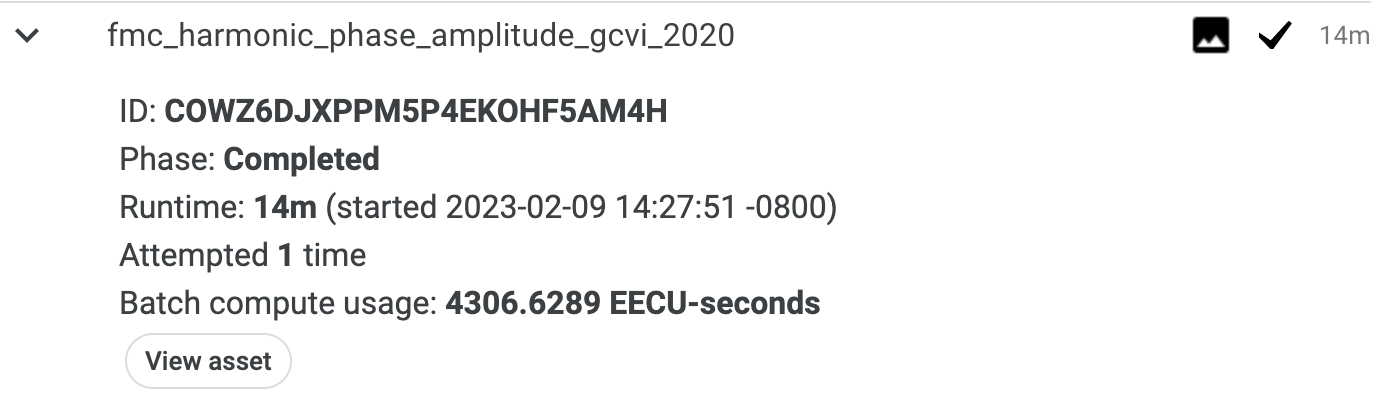

## 4.3 Harmonic Inference

Once the regression is computed, we can use the resulting cofficients to run "predictions" along the fitted curve. This can be very helpful for a variety of applications. For example, we can predict daily GCVI in in the early part of the seaons to determine emergence time when observations can be spotty. Or we can determine what's the maximum grenness at the peak of the season, if observations around that time aren't available.

#### Inference Functions

In [ ]:
def fitHarmonicImg(harmonicimg, hregrimg):

  """
  Note: this function expects the coefficient bands to have the same names of
  the independendents; so no 'NDVI_cos1' but just 'cos1'. This is to make it
  work for inference on dummy collections.
  """
  independents = ee.List(hregrimg.get('independents')).sort()
  fitted = ee.Image(harmonicimg).select(independents)\
    .multiply(hregrimg.select(independents))\
    .reduce('sum')

  props2copy = harmonicimg.toDictionary().keys().cat(["system:time_start"])

  return ee.Image(fitted.copyProperties(harmonicimg, props2copy))

In [ ]:
def fitHarmonicColl(harmonicoll, hregrimg, band):

    indeps = ee.List(hregrimg.get('independents')).sort()

    bandcoeffs_names = indeps.map(lambda i: ee.String(band).cat(ee.String('_')).cat(ee.String(i)))

    hregrimg = hregrimg.select(bandcoeffs_names, indeps)
    newname = band+"_FIT"
    fit = harmonicoll.map(
        lambda himg: fitHarmonicImg(himg, hregrimg).select([0],[newname])
    )

    return fit


#### Dummy Independents

To predict any date, we need a couple of functions that generate harmonic independents for any input date. It's useful to have a refrence image mask to generate the inferred image with the right characteristics.

In [ ]:
def dummyTime(date, refdate, imgmask):

  date = ee.Date(date)
  refdate = ee.Date(refdate)

  dummy = imgmask.add(date.millis()).select([0],['dummy'])
  dummy = dummy.set('date', date.format(), 'system:time_start', date.millis())

  # dyear = date.difference(refdate, 'year')
  # t = dummy.select(0).multiply(0).add(dyear).select([0],['t']).float()

  return dummy

In [ ]:
def _getDummyHarmonics(startdate, enddate, refdate, ndays, imgmask, nharmonics, omega):

  diff = enddate.difference(startdate, 'day')
  dt = ee.List.sequence(1, diff, None, ndays)

  dates = dt.map(lambda i: startdate.advance(ee.Number(i).round(), 'day'))
  dummys = dates.map(lambda d: dummyTime(d, startdate, imgmask))

  dummycoll =  ee.ImageCollection.fromImages(dummys).set(
      'startdate', startdate,
      'enddate', enddate,
      'ndays', ndays)

  harmcoll = getHarmonicCollection(dummycoll, refdate, nharmonics, omega)

  return harmcoll

This function is forcing the creation of harmonic independents within the starting and ending date used for the regression. Inferring future observations is not recomended. The user can still choose how many observations they want to generate within the date range.

In [ ]:
def dummyHarmonics(hregrimg, ndays):

  startdate = ee.Date(hregrimg.get('startdate'))
  enddate = ee.Date(hregrimg.get('enddate'))
  refdate = ee.Date(hregrimg.get('refdate'))
  omega = ee.Number(hregrimg.get('omega'))
  nharmonics = ee.Number(hregrimg.get('nharmonics'))
  imgmask = hregrimg.select(0).mask()
  harmcoll = _getDummyHarmonics(startdate, enddate, refdate, ndays, imgmask, nharmonics, omega)

  return harmcoll

In [ ]:
def dummyInference(hregrimg, ndays, band):

  harmcoll = dummyHarmonics(hregrimg, ndays)
  harmfit = fitHarmonicColl(harmcoll, hregrimg, band)

  return harmfit

#### Putting it all together

Let's generate an inferred curve with 100 observations from the harmonic regression we defined in the previous section.

In [ ]:
dailyinfer = dummyInference(harmregr, 100,'GCVI')

In [ ]:
# dailyinput.limit(10)
# dailyinfer.limit(10)

Extract the average time series from the subset of fields:

In [ ]:
meants = reduceImgCollRegions(dailyinfer, indiana_subset, 10, ee.Reducer.mean())

In [ ]:
meants_df = geemap.ee_to_geopandas(meants)
meants_df.head()

geometry        FID  crop  \
0  MULTIPOLYGON (((-86.29973 40.32152, -86.29963 ...  FID920997  corn   
1  MULTIPOLYGON (((-86.02784 40.15654, -86.02781 ...  FID418483  corn   
2  POLYGON ((-86.05047 40.20507, -86.05042 40.204...  FID208761  corn   
3  POLYGON ((-86.12781 40.20443, -86.12780 40.204...   FID97940  corn   
4  MULTIPOLYGON (((-86.03673 40.19611, -86.03674 ...  FID787599  corn   

          end  index      mean   region       start  system:time_start  
0  2022-08-31      0  0.840137  Indiana  2022-04-15      1585932140663  
1  2022-08-31      1  0.734645  Indiana  2022-04-15      1585932140663  
2  2022-08-31      2  1.061747  Indiana  2022-04-15      1585932140663  
3  2022-08-31      3  0.929648  Indiana  2022-04-15      1585932140663  
4  2022-08-31      4  0.944728  Indiana  2022-04-15      1585932140663

Merging with observed Sentinel 2 data for plotting:

In [ ]:
meants_df = meants_df.rename(columns={'mean':'GCVI_FIT'})

In [ ]:
# gcvidf.head()

In [ ]:
import plotly.graph_objects as go
# fig3 = px.line(gcvidf, x='system:time_start', y='GCVI_FIT', color='FID')
# fig3.add_traces(px.scatter(gcvidf, x='system:time_start', y='GCVI', color='FID'))
fig3 = px.scatter(indiana_subset_coll_stats_df, x='system:time_start', y='GCVI', color='FID', facet_col='FID')
fig3.add_traces(px.line(meants_df, x='system:time_start', y='GCVI_FIT', color='FID', facet_col='FID').data)
fig3.show()

Obviously these fits are imperfect, but there is a ton of room for improvement - starting from filtering the input data better.

#  🤖 5 Machine Learning Applications

For a great overview of ML in EE: https://developers.google.com/earth-engine/guides/machine-learning


## 5.1 Built-in VS. Custom Models

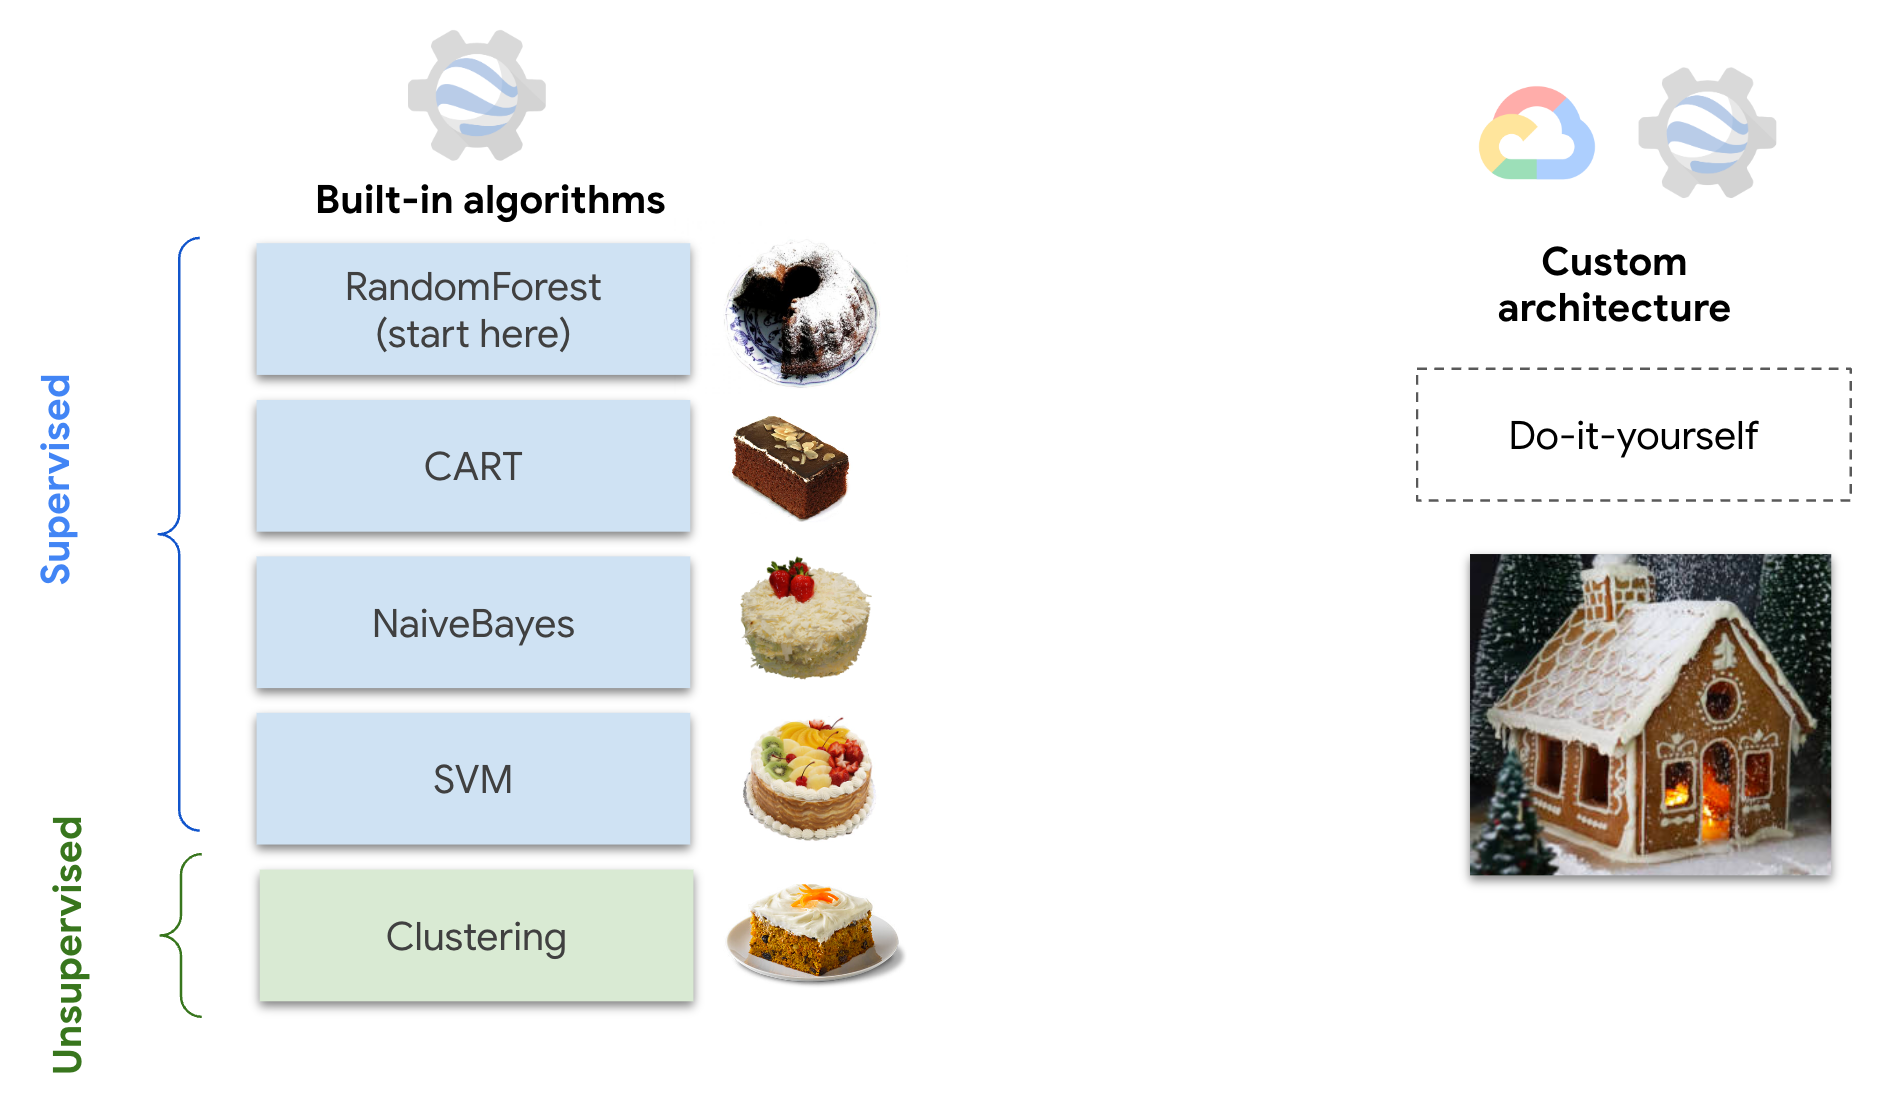

*☝️ Image Courtesy of: Nick Clinton, Alexandrina GV, David Cavazos (EE team)*

How to choose between built-in and custom models?

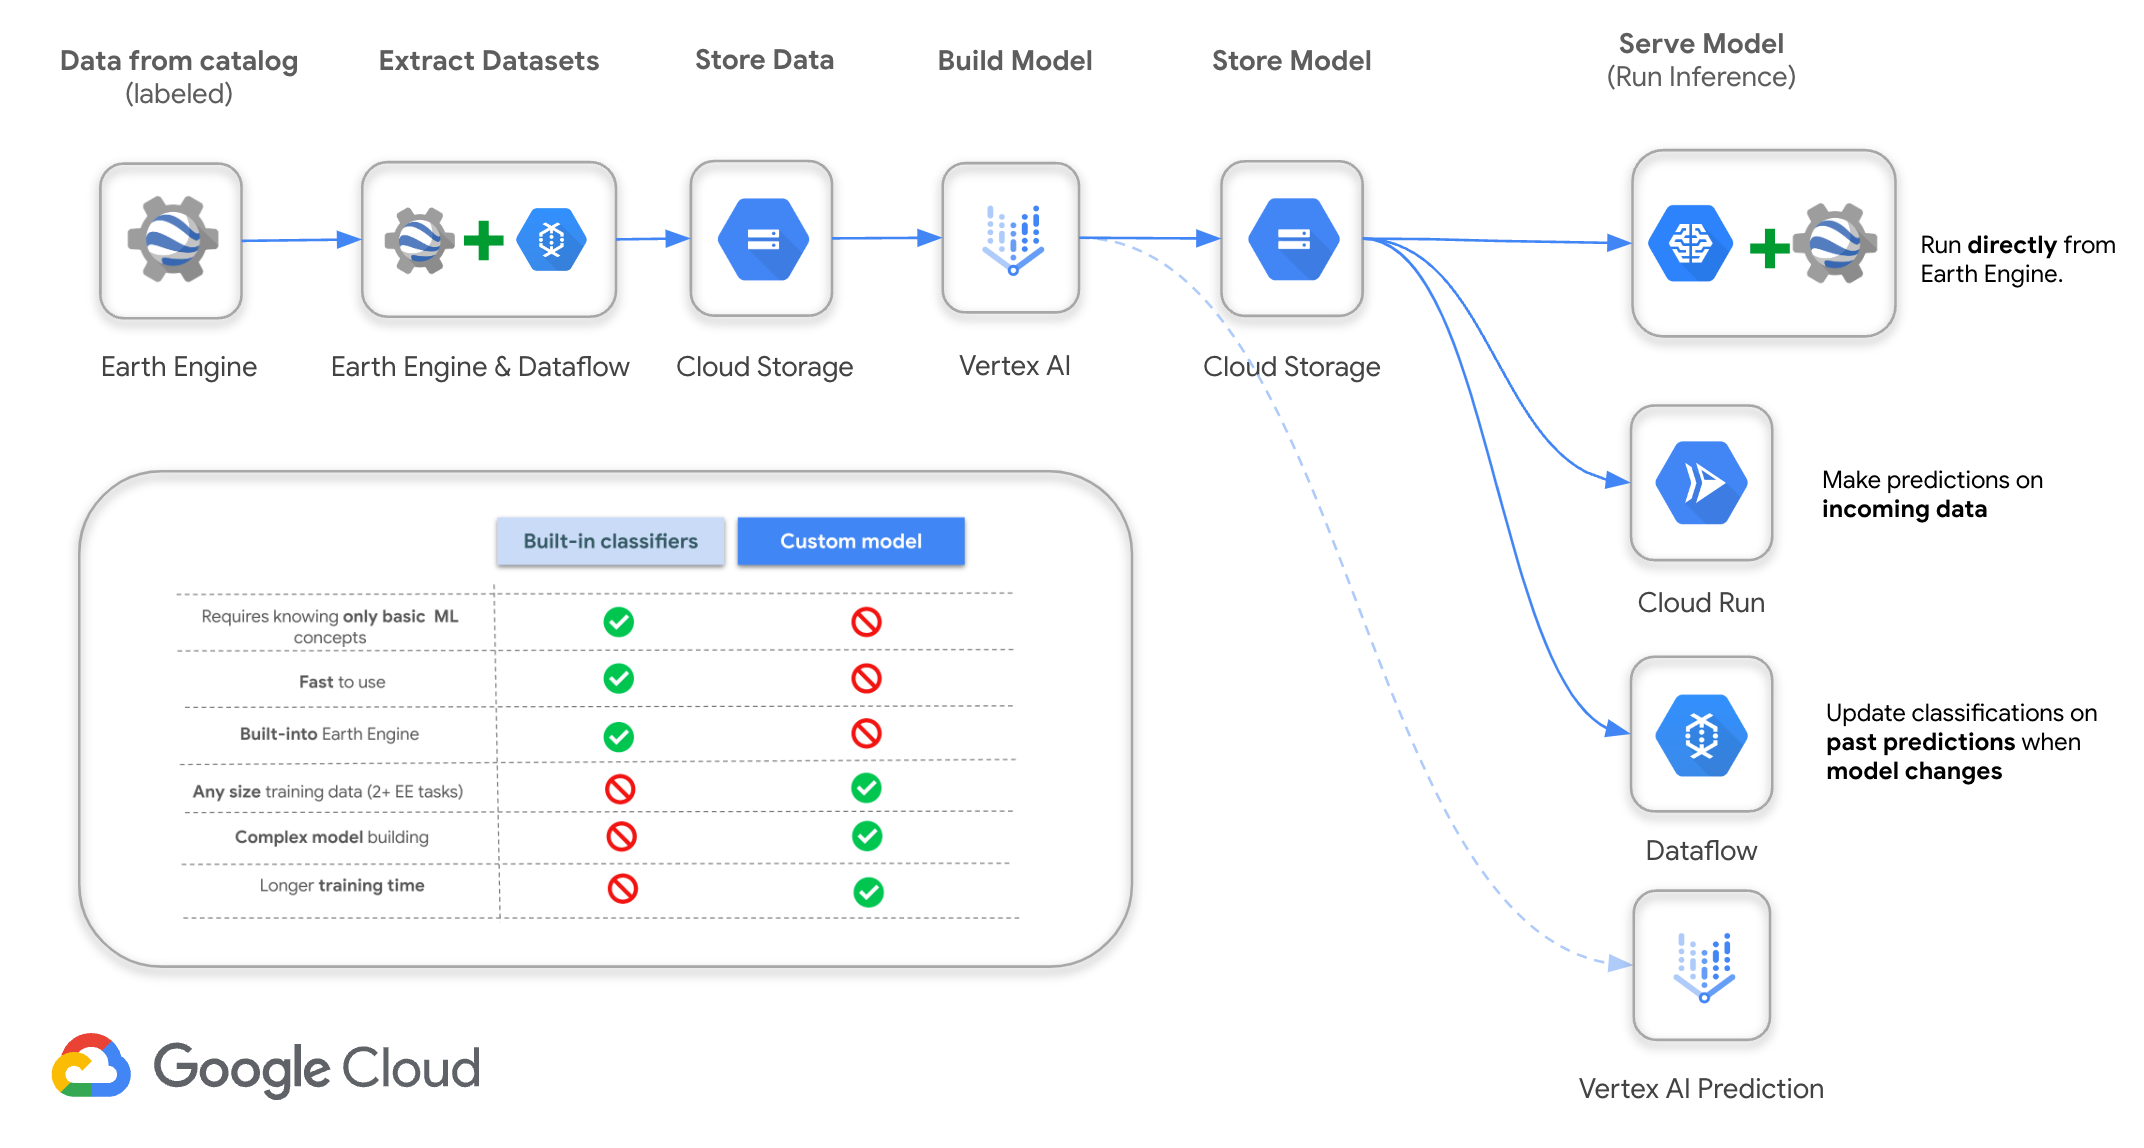

Here is a great set of examples for building custom models in Tensor Flow using a set of Google Cloud tools: https://developers.google.com/earth-engine/guides/tf_examples

Here is another great example: https://colab.research.google.com/github/GoogleCloudPlatform/python-docs-samples/blob/main/people-and-planet-ai/land-cover-classification/README.ipynb

## 5.2 Built-in Example: Random Forest Classification

We're going to build a Random Forest model for crop type classification, using EE's built in functions.

🛑 Note: this is just an exercise to show a typical workflow. The results are going to be innacurate as nothing in this example is optimized - there is a ton of room for improvement for a real-life application!

### 5.2.1 Building Labels from CDL

We don't have real labels to train a classifier, so we're going to use a fairly accurate crop classification layer from USDA called CDL. We'll extract random points from it and use them as our labels.

In [ ]:
cdl = ee.ImageCollection("USDA/NASS/CDL")
cdl2020 = ee.Image(cdl.filter(ee.Filter.eq('system:index','2020')).first()).clip(roi)
cdl2020

In [ ]:
cdlhistog = reduceImgRegions(cdl2020.select('cropland'), ee.FeatureCollection([roi]),30,ee.Reducer.autoHistogram())

In [ ]:
cdlhistog = ee.List(ee.Feature(cdlhistog.first()).get('histogram'))
cdlhistog

Let's extract only the corn labels for a binary classification:

In [ ]:
cdl2020_corn = cdl2020.select('cropland').eq(1)
cdl2020_sweetcorn = cdl2020.select('cropland').eq(12)
cdl2020_orncorn = cdl2020.select('cropland').eq(13)
cdl2020_allcorn = cdl2020_corn.Or(cdl2020_sweetcorn).Or(cdl2020_orncorn).select([0],['CORNLAND'])

In [ ]:
cdlviz = {'bands':['CORNLAND'], 'palette':['#5E5D53','#FFEC00'], min:0, max:1}

In [ ]:
Map2 = geemap.Map()
Map2.centerObject(roi, 11)
Map2.addLayer(roi, {'color':'#330181'}, 'ROI', True)
Map2.addLayer(cdl2020_allcorn, cdlviz, 'CORN')
Map2.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map2.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map2.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map2.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map2.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map2

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…

In [ ]:
classimg = phasampl.addBands(cdl2020_allcorn)

In [ ]:
classimg.bandNames()

Using stratified sample to get our labels.

In [ ]:
trainsamples = classimg.stratifiedSample(300, 'CORNLAND', roi, 10, seed=123, geometries=True)
testsamples = classimg.stratifiedSample(50, 'CORNLAND', roi, 10, seed=456, geometries=True)

At this point, we're getting close to memory limits; better to batch export this tables and reimport them for the rest of this notebook.

In [ ]:
fnametrain = 'fmc_trainsamples_cornland_2020'
fnametest = 'fmc_testsamples_cornland_2020'
path = 'projects/ee-customer-fmc/assets/test_data/'

exptask1 = ee.batch.Export.table.toAsset(**{
    'collection':trainsamples,
    'description':fnametrain,
    'assetId':path+fnametrain
    # 'maxVertices'
})

exptask2 = ee.batch.Export.table.toAsset(**{
    'collection':testsamples,
    'description':fnametest,
    'assetId':path+fnametest
    # 'maxVertices'
})

In [ ]:
# exptask1.start()
# exptask2.start()

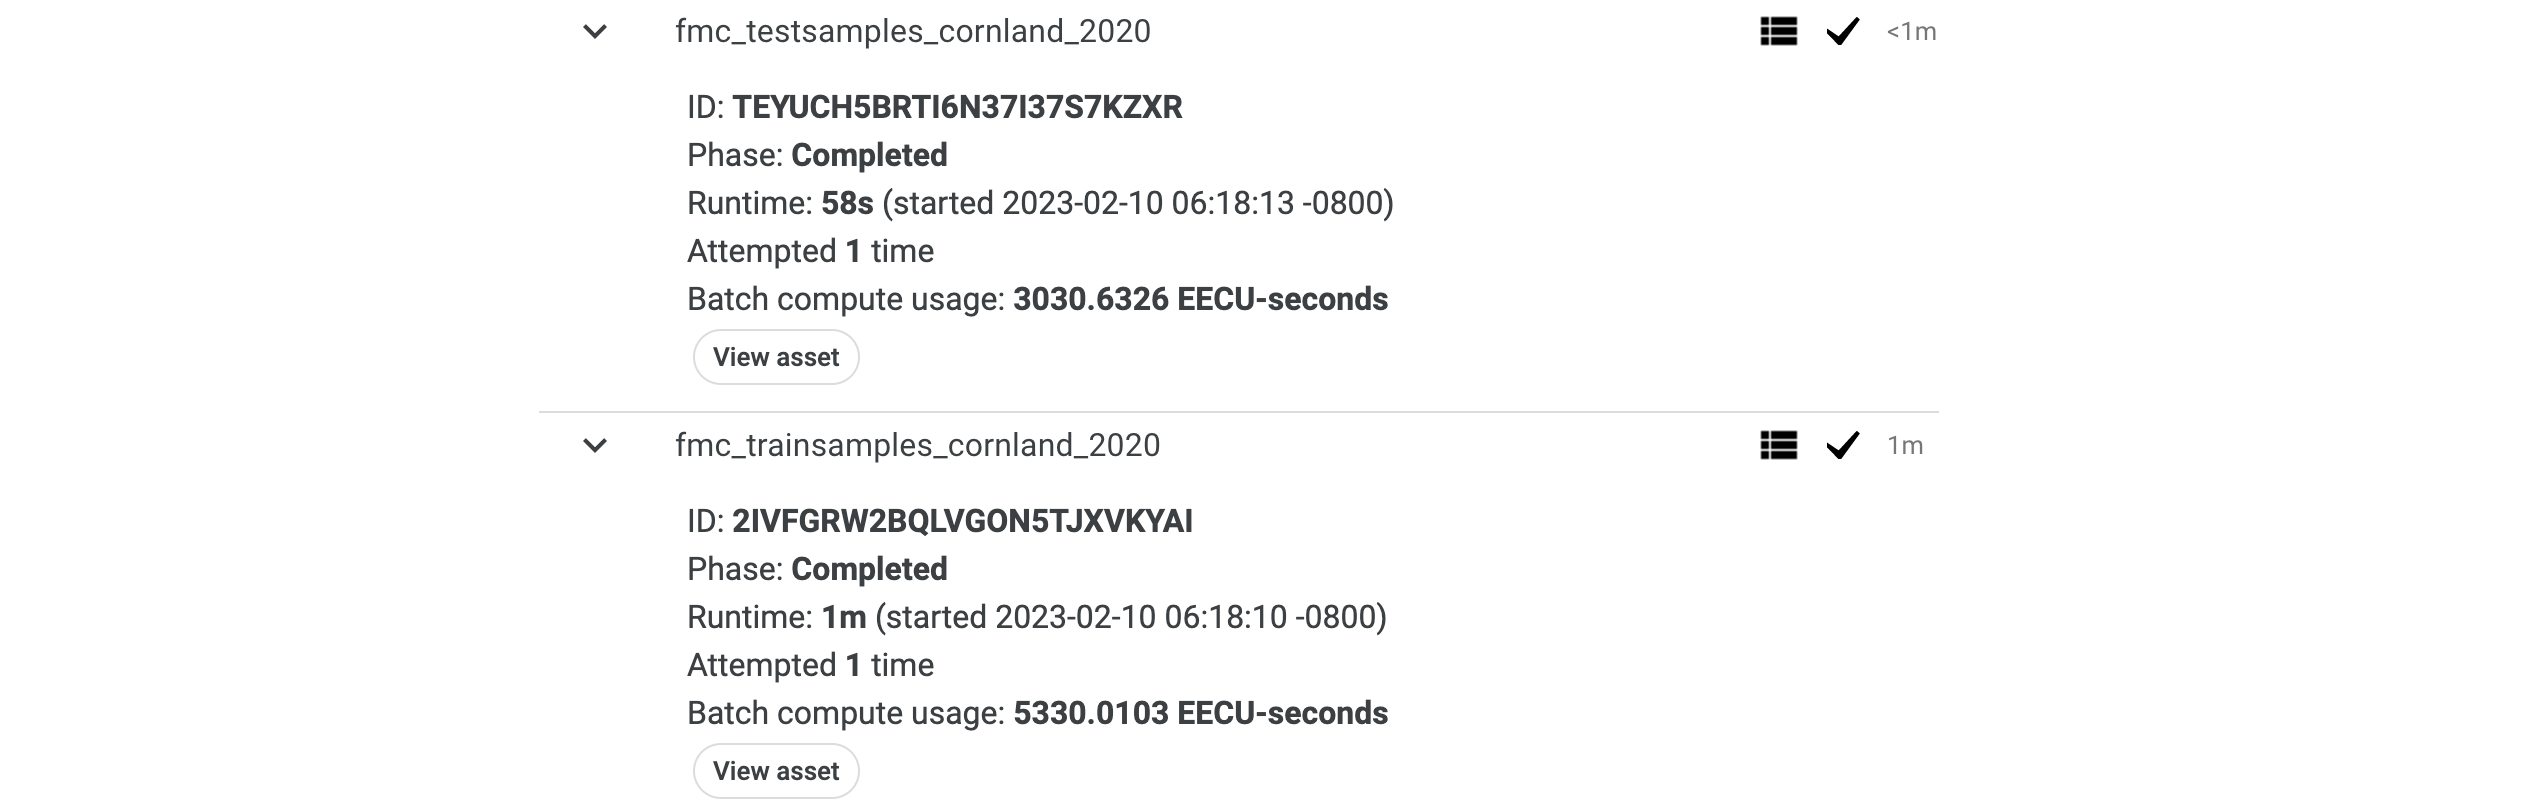

Reimporting the samples:

In [ ]:
trainsamples_imp = ee.FeatureCollection(path+'fmc_trainsamples_cornland_2020')
testsamples_imp = ee.FeatureCollection(path+'fmc_testsamples_cornland_2020')

In [ ]:
trainsamples_imp.limit(10)

In [ ]:
Map4 = geemap.Map()
Map4.centerObject(roi, 11)
Map4.addLayer(roi, {'color':'#330181'}, 'ROI', True)
Map4.addLayer(cdl2020_allcorn, cdlviz, 'CORN')
Map4.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map4.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map4.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map4.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map4.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map4.addLayer(trainsamples_imp, {'color':'#00F3FF'}, 'Train', True)
Map4.addLayer(testsamples_imp, {'color':'#E68212'}, 'Test', True)
Map4

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…

### 5.2.2 Building the model

Compute performance metrics from validation table:

In [ ]:
def performanceFromTable(classified_table, classlab):

    cfmatrix = classified_table.errorMatrix(classlab, 'classification')
    acc = cfmatrix.accuracy()
    consacc = cfmatrix.consumersAccuracy()
    prodacc = cfmatrix.producersAccuracy()
    k = cfmatrix.kappa()

    return ee.Feature(None).set({
        'cfmatrix': cfmatrix,
        'accuracy': acc,
        'prod_accuracy': prodacc,
        'cons_accuracy': consacc,
        'kappa': k
    })

Train the model, apply to validation table, get performance metrics:

In [ ]:
def ttClassif(classifier, train_table, valid_table, bands, classlab):

    #Train input classifier and get decision tree
    trained = classifier.train(train_table, classlab, bands)

    ## Get confusion matrix and accuracy (based on test table)
    classified_table = valid_table.classify(trained, 'classification')

    perform = performanceFromTable(classified_table, classlab);

    return ee.Feature(None).set({

        'classifier': trained,
        'classified_table': classified_table

    }).copyProperties(perform);

Define the model:

In [ ]:
def getRFClassif(train_table, valid_table, bands, classlab):

    classif = ee.Classifier.smileRandomForest(**{
        'numberOfTrees': 200,
        # 'variablesPerSplit': 5,
        'minLeafPopulation': 10,
        'bagFraction': 0.5,
        'seed': 12345
    })

    return ttClassif(classif, train_table, valid_table, bands, classlab);

In [ ]:

selfeats =[
'GCVI_AMPLITUDE1',
'GCVI_AMPLITUDE2',
'GCVI_AMPLITUDE3',
'GCVI_LRVERTSHIFT',
'GCVI_MNVERTSHIFT',
"GCVI_PHASE1",
'GCVI_PHASE2',
'GCVI_PHASE3',
]

In [ ]:
rfclassif = getRFClassif(trainsamples_imp, testsamples_imp, selfeats, 'CORNLAND')

In [ ]:
rfclassif

In [ ]:
# classified_table = testsamples_imp.classify(ee.Classifier(rfclassif.get('classifier')), 'classification')

In [ ]:
# classified_table.limit(10)

As expected: very bad results

### 5.2.3 Inference

Finally we build a function to run inference:

In [ ]:
def classifyComp(comp, classif, features):

    inputimg = comp.select(features)

    classified = inputimg.classify(ee.Classifier(classif.get('classifier')));
    classified = ee.Image(classified.copyProperties(classif, None, ['classifier', 'classified_table']));

    return classified

In [ ]:
imginf = classifyComp(phasampl, rfclassif, selfeats).select(['classification'],['CORNLAND']).clip(roi)

In [ ]:
cornfname = 'fmc_corn_classification_2020'
path = 'projects/ee-customer-fmc/assets/test_data/'

exptask_asset =ee.batch.Export.image.toAsset(**{
    'image':imginf,
    'description':cornfname,
    'assetId':path+fname,
    'region':roi,
    'scale':10,
    'maxPixels':1e10,
    })

In [ ]:
# exptask_asset.start()

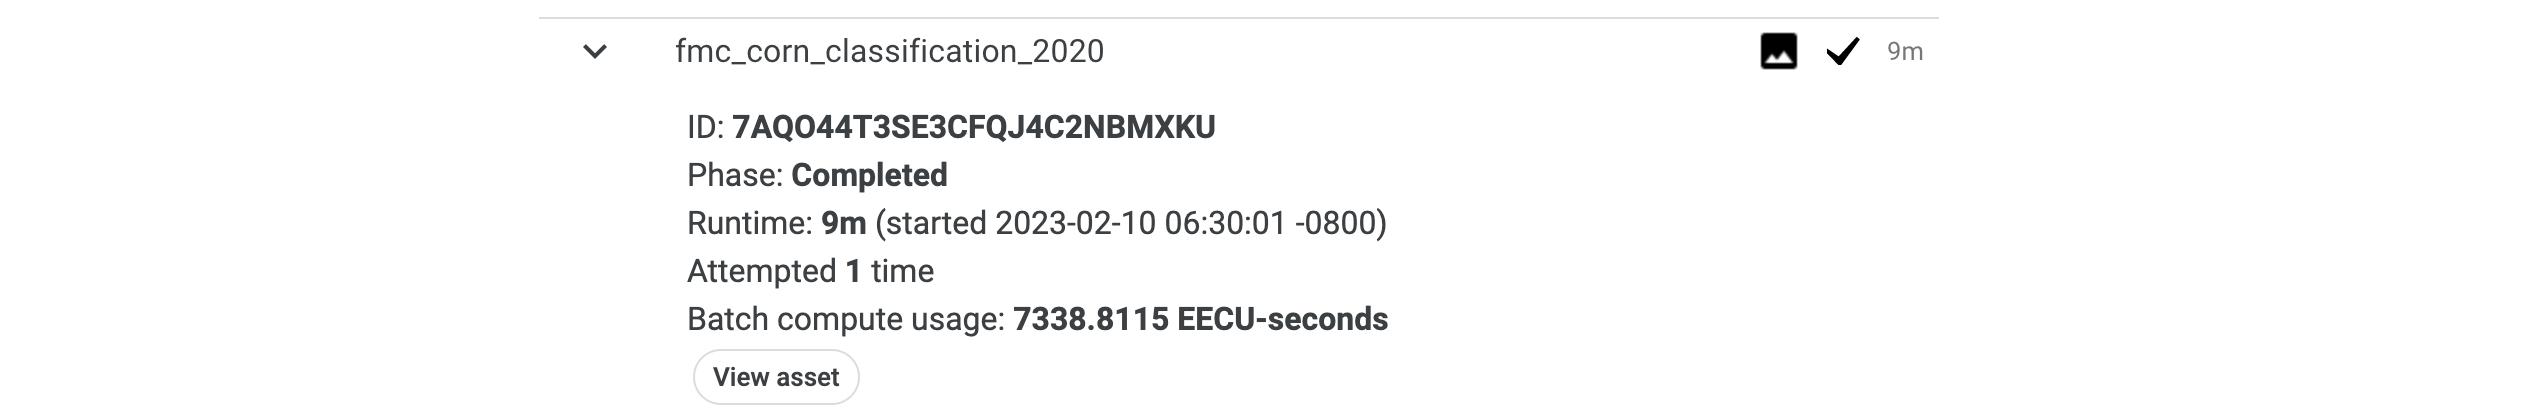

In [ ]:
impinference = ee.Image(path+cornfname)

In [ ]:
Map4 = geemap.Map()
Map4.centerObject(roi, 12)
Map4.addLayer(roi, {'color':'#330181'}, 'ROI', True)
Map4.addLayer(cdl2020_allcorn, cdlviz, 'CDL')
Map4.addLayer(impinference.selfMask(), {'palette':['#E66212']}, 'RF Inference')
Map4.addLayer(indiana_fc, {'color':'#FF008F'}, 'Fields', True)
Map4.addLayer(testfield1, {'color':'#FFE800'}, 'Test Field 1', True)
Map4.addLayer(testfield2, {'color':'#00FFE0'}, 'Test Field 2', True)
Map4.addLayer(testpoint1, {'color':'#FFE800'}, 'Test Point 1', True)
Map4.addLayer(testpoint2, {'color':'#00FFE0'}, 'Test Point 2', True)
Map4

Map(center=[40.324747101234166, -86.11603016482233], controls=(WidgetControl(options=['position', 'transparent…